# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Skillfactory---Практический-Machine-Learning" data-toc-modified-id="Skillfactory---Практический-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Skillfactory - Практический Machine Learning</a></div><div class="lev2 toc-item"><a href="#19/02/2018---Аномалии,-работа-с-признаками,-пайплайны-(практика)" data-toc-modified-id="19/02/2018---Аномалии,-работа-с-признаками,-пайплайны-(практика)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>19/02/2018 - Аномалии, работа с признаками, пайплайны (практика)</a></div><div class="lev1 toc-item"><a href="#Создание-пайплайна-и-генерация-признаков" data-toc-modified-id="Создание-пайплайна-и-генерация-признаков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Создание пайплайна и генерация признаков</a></div><div class="lev2 toc-item"><a href="#Посмотрим-на-данные" data-toc-modified-id="Посмотрим-на-данные-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим на данные</a></div><div class="lev2 toc-item"><a href="#Генерим-признаки" data-toc-modified-id="Генерим-признаки-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Генерим признаки</a></div><div class="lev2 toc-item"><a href="#Подбор-гипер-параметров" data-toc-modified-id="Подбор-гипер-параметров-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подбор гипер-параметров</a></div><div class="lev3 toc-item"><a href="#Pipeline" data-toc-modified-id="Pipeline-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Pipeline</a></div><div class="lev3 toc-item"><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Подбор гиперпараметров</a></div><div class="lev4 toc-item"><a href="#Grid-search" data-toc-modified-id="Grid-search-2321"><span class="toc-item-num">2.3.2.1&nbsp;&nbsp;</span>Grid search</a></div><div class="lev4 toc-item"><a href="#Random-Search" data-toc-modified-id="Random-Search-2322"><span class="toc-item-num">2.3.2.2&nbsp;&nbsp;</span>Random Search</a></div><div class="lev3 toc-item"><a href="#HyperOpt" data-toc-modified-id="HyperOpt-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>HyperOpt</a></div><div class="lev2 toc-item"><a href="#Ваш-черед" data-toc-modified-id="Ваш-черед-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Ваш черед</a></div><div class="lev3 toc-item"><a href="#Новые-признаки" data-toc-modified-id="Новые-признаки-241"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Новые признаки</a></div><div class="lev2 toc-item"><a href="#Поиск-гиперпараметров" data-toc-modified-id="Поиск-гиперпараметров-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Поиск гиперпараметров</a></div>

# Skillfactory - Практический Machine Learning
## 19/02/2018 - Аномалии, работа с признаками, пайплайны (практика)

<center> Шестаков Андрей </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Создание пайплайна и генерация признаков
<center>Шестаков Андрей</center>

В этом задании мы рассмотрим данные с предыдущего Sberbank Data Science Contest. К сожалению найти страницу с конкурсом уже не получается.

Одной из задач была опредление пола владельца карты по его транзакциям на карте. Зачем это нужно - одному сберу известно, но эта задача была хороша тем, что в ней можно нагенерировать много разных признаков

Есть такая [презентация](https://alexanderdyakonov.files.wordpress.com/2016/10/dj2016_sdsj_vis.pdf) с предварительным анализом данных и идеями про признаки

Нам понадобятся файлы `customers_gender_train.csv`, `transactions.tsv.gz`, `mcc_types.tsv` и `trans_types.tsv`.

## Посмотрим на данные

Это метки ответов

In [2]:
df_gender = pd.read_csv('data/customers_gender_train.csv')
df_gender.head()

,customer_id,gender
0,75562265,0
1,10928546,1
2,69348468,1
3,84816985,1
4,61009479,0


Это сами транзакции (отрицательные транзакции - списывание, положительные - зачисление на счет)

In [3]:
df_transactions = pd.read_csv(r'C:\Users\acer\Desktop\skillfactory\9\hw\data\transactions.csv.gz')
df_transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN


Далее, расшифровки кодов [mcc](https://ru.wikipedia.org/wiki/Merchant_Category_Code) и транзакций

In [4]:
df_tr = pd.read_csv('data/tr_types.csv', sep=';')
df_tr.head()

,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...


In [5]:
df_mcc = pd.read_csv('data/tr_mcc_codes.csv', sep=';')
df_mcc.head()

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело


Первое что мы видим - это странная дата и суммы в транзакциях. 

В принципе, посмотрев на исходное распределение "относительных" дат по какой-нибудь гендерной группы mcc, становится примерно понятно, что за даты закодированы.

Ну а суммы транзакций организаторы просто умножили на $\pi^{\exp}$ =)

Преобразование будет проделано ниже, но при желании, можете сами со всем разобраться.

In [6]:
from pandas import Timestamp, DateOffset

In [7]:
def preproc_transactions(df_transactions):
    sec_per_day = 86400
    sec_per_hour = 3600
    
    start_date = 1420070400 - 154 * sec_per_day - 3 * sec_per_hour
    
    df_transactions.loc[:, 'day'] = df_transactions.tr_datetime\
                                               .str.split(' ')\
                                               .str.get(0)\
                                               .astype(int)
    df_transactions.loc[:, 'time_raw'] = df_transactions.tr_datetime\
                                                    .str.split(' ')\
                                                    .str.get(1)

    # set temp dt
    df_transactions.loc[:, 'dt_temp'] = pd.to_datetime(df_transactions.loc[:, 'time_raw'], 
                                                    format='%H:%M:%S')\
                                        + DateOffset(years=115)
    
    df_transactions = df_transactions.assign(dt = lambda x: x.dt_temp.astype(np.int64) // 10**9
                                             + (x.day - 153) * sec_per_day)\
                                     .assign(weekday = lambda x: ((x.day + 4) % 7 + 1))
        
    df_transactions.loc[:, 'datetime'] = pd.to_datetime(df_transactions.dt, unit='s')
    df_transactions.loc[:, 'date'] = df_transactions.loc[:, 'datetime'].dt.strftime('%Y-%m-%d')
    df_transactions.loc[:, 'hour'] = df_transactions.loc[:, 'datetime'].dt.strftime('%H')
    
    df_transactions = df_transactions.drop(['dt_temp', 'time_raw', 'tr_datetime'], axis=1)
    
    df_transactions.loc[:, 'amount'] = np.round(df_transactions.loc[:, 'amount']/(np.pi**np.exp(1)))
            
    return df_transactions

In [8]:
df_transactions = df_transactions.pipe(preproc_transactions)

In [9]:
df_transactions.head()

,customer_id,mcc_code,tr_type,amount,term_id,day,dt,weekday,datetime,date,hour
0,39026145,4814,1030,-100.0,NaN,0,1406888606,5,2014-08-01 10:23:26,2014-08-01,10
1,39026145,6011,7010,2500.0,NaN,1,1406974769,6,2014-08-02 10:19:29,2014-08-02,10
2,39026145,4829,2330,-2500.0,NaN,1,1406974856,6,2014-08-02 10:20:56,2014-08-02,10
3,39026145,5499,1010,-62.0,NaN,1,1406975994,6,2014-08-02 10:39:54,2014-08-02,10
4,39026145,5499,1010,-41.0,NaN,2,1407080022,7,2014-08-03 15:33:42,2014-08-03,15


## Генерим признаки

В качестве базовых признаков, можно взять, например, 
* количество (доля) транзакций по каждому mcc_code
* количество (доля) транзакций в разные промежутки времени

In [10]:
def gen_features(df_gender, df_transactions):
    
    df_mcc_counts = \
        df_transactions.pivot_table(index=['customer_id'], columns='mcc_code', values='amount', 
                             aggfunc=np.size, fill_value=0)

    df_mcc_counts = df_mcc_counts.rename_axis(lambda x: 'mcc_{}_count'.format(x), axis=1)

    df_hour_rations = \
        df_transactions.pivot_table(index=['customer_id'], columns='hour', values='amount', 
                             aggfunc=np.size, fill_value=0)

    # Сложная и нетривиальная конструкция
    total = df_hour_rations.sum(axis=1)
    df_hour_rations.loc[:, 'morning'] = (df_hour_rations.loc[:, '05':'11'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'day'] = (df_hour_rations.loc[:, '12':'17'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'evening'] = (df_hour_rations.loc[:, '18':'23'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'night'] = (df_hour_rations.loc[:, '00':'04'].sum(axis=1).T/total).T


    # Объединяем:
    df_features = df_gender.join(df_mcc_counts, on='customer_id', how='left')\
                           .join(df_hour_rations.loc[:, ['morning', 'day', 'evening', 'night']], on='customer_id', how='left')
        
    return df_features

In [11]:
df_features = df_gender.pipe(gen_features, df_transactions)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead


In [12]:
label = 'gender'
idx_features = df_features.columns != label

In [13]:
X = df_features.loc[:, idx_features].values
y = df_features.loc[:, ~idx_features].values.flatten()

## Подбор гипер-параметров

### Pipeline

Сделаем простой sklearn пайплайн, который делает следующее:
* Нормирует признаки через StandartScaler
* Запускает лог-регрессию

In [14]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression

In [15]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

In [16]:
RND_SEED = 123

### Подбор гиперпараметров

До этого мы исключительно смотрели, как влияет на меру качества какой-то один параметр при фиксированных остальных. Пришло время перебирать все что можно!

В базовом варианте, это делается либо через `Grid Search`, либо через `Random Search`. Какие ключевые отличия?
* В `Grid Search` вы в явнов виде задаете возможные значения каждого гипер-параметра, который хотите варьировать. Соответственно, выполняется **полный** перебор всех возможных комбинаций
* В `Random Search` допукается указание распределения параметров, например "равномерно, на интервале от 0 до 100" или "нормальное распределение с таким-то цетром и такой-то дисперсией. Соответственно, так как это случайный перебор, то **вы** просто **задаете** количество случайных комбинаций, которые будут проверяться

Может показаться, что делать случайный перебор опасно - там же все случайно. Но на практике именно он и используется в силу двух причин
* Полный перебор большого количества комбинаций очень долгий
* Мы можем просто пропустить значения гиперпараметра, которые сильно влияют на метрику качества (см рисунок снизу)

<img src='img/gridsearch.jpeg'>

Попробуем оба варианта

#### Grid search

In [17]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold


In [18]:
# Задаем значения параметров, которые хотим проверить

# в данном случае "__" разленяет название гиперпараметра от этапа, где этот гиперпараметр используется
# если у нас будет не пайплайн, а просто один классификатор, то разделитель указывать не нужно
param_grid = {
    'scaler__with_mean': [False, True],
    'clf__penalty': ['l1', 'l2'],
    'clf__random_state': [RND_SEED],
    'clf__C': np.logspace(-5, 3, 10)
}

print(param_grid)

# Задаем схему кросс-валидации
cv = StratifiedKFold(n_splits=5, random_state=RND_SEED, shuffle=True)

{'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4.64158883e-03,
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03])}


In [19]:
'''grid_searcher = GridSearchCV(model, param_grid, 
                             scoring='roc_auc', 
                             n_jobs=-1, cv=cv, 
                             verbose=2)'''
grid_searcher = GridSearchCV(model, param_grid, 
                             scoring='roc_auc', 
                             cv=cv, 
                             verbose=2)

gs=grid_searcher.fit(X, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.5s
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.4s
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.2s
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.2s
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.2s
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.4s
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, tota

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  3.4min finished


На выходе в grid_searcher можно посмотреть, какая комбинация оказалась наилучшей, сколько занял рачет и напрямую достать лучшую модель.

In [20]:
grid_searcher.best_params_

{'clf__C': 0.03593813663804626,
 'clf__penalty': 'l1',
 'clf__random_state': 123,
 'scaler__with_mean': True}

In [21]:
grid_searcher.best_score_

0.8333672337310287

In [22]:
results = pd.DataFrame(grid_searcher.cv_results_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

In [23]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__penalty,param_clf__random_state,param_scaler__with_mean,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.362031,0.057250,0.049979,0.061207,1e-05,l1,123,False,"{'clf__C': 1e-05, 'clf__penalty': 'l1', 'clf__...",0.500000,...,0.500000,0.000000,36,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000
1,0.381631,0.020720,0.028124,0.006251,1e-05,l1,123,True,"{'clf__C': 1e-05, 'clf__penalty': 'l1', 'clf__...",0.500000,...,0.500000,0.000000,36,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000
2,0.348784,0.053395,0.021852,0.007633,1e-05,l2,123,False,"{'clf__C': 1e-05, 'clf__penalty': 'l2', 'clf__...",0.785334,...,0.793321,0.006108,34,0.797821,0.800335,0.800359,0.796988,0.800062,0.799113,0.001423
3,0.439399,0.006927,0.021864,0.007632,1e-05,l2,123,True,"{'clf__C': 1e-05, 'clf__penalty': 'l2', 'clf__...",0.786911,...,0.797828,0.010103,33,0.799328,0.810066,0.808778,0.799038,0.803717,0.804185,0.004604
4,0.289055,0.009734,0.024977,0.007654,7.74264e-05,l1,123,False,"{'clf__C': 7.742636826811278e-05, 'clf__penalt...",0.500000,...,0.500000,0.000000,36,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000


In [24]:
best_model = grid_searcher.best_estimator_

#### Random Search

In [25]:
from scipy.stats import randint as sp_randint
from scipy.stats import lognorm as sp_lognorm

In [26]:
sp_lognorm(4).rvs()

480.01661688700796

In [27]:
# Задаем значения параметров, которые хотим проверить
# Теперь с распределениями
param_grid = {
    'scaler__with_mean': [False, True],
    'clf__penalty': ['l1', 'l2'],
    'clf__random_state': [RND_SEED],
    'clf__C': sp_lognorm(4)
}

print(param_grid)

{'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021431A05A58>}


In [28]:
# Рассмотрим 20 случайных комбинаций
'''random_searcher = RandomizedSearchCV(model, param_grid, n_iter=20, 
                                     random_state=RND_SEED,
                                     scoring='roc_auc', 
                                     n_jobs=-1, cv=cv, 
                                     verbose=2)'''

random_searcher = RandomizedSearchCV(model, param_grid, n_iter=20, 
                                     random_state=RND_SEED,
                                     scoring='roc_auc', 
                                     cv=cv, 
                                     verbose=2)

random_searcher.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.2s
[CV] clf__C=54.02148221946703, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=54.02148221946703, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.6s
[CV] clf__C=54.02148221946703, clf__penalt

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.2min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
          error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021431A05A58>},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=2)

Аналогичный выхлоп

In [29]:
random_searcher.best_params_

{'clf__C': 0.066168907176401,
 'clf__penalty': 'l1',
 'clf__random_state': 123,
 'scaler__with_mean': False}

In [30]:
random_searcher.best_score_

0.8331585112406745

In [31]:
results = pd.DataFrame(random_searcher.cv_results_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

In [32]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__penalty,param_clf__random_state,param_scaler__with_mean,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.345835,0.012022,0.015610,0.000012,0.0130037,l1,123,False,"{'clf__C': 0.013003686130638284, 'clf__penalty...",0.827471,...,0.829823,0.004285,10,0.835124,0.834699,0.835106,0.835920,0.833295,0.834829,0.000863
1,0.689186,0.028162,0.015635,0.000020,54.0215,l1,123,True,"{'clf__C': 54.02148221946703, 'clf__penalty': ...",0.829487,...,0.829797,0.003313,14,0.849481,0.850480,0.849283,0.850175,0.848428,0.849569,0.000719
2,4.169355,0.700147,0.027752,0.010924,0.0988254,l1,123,True,"{'clf__C': 0.09882536189042468, 'clf__penalty'...",0.831300,...,0.832554,0.003362,3,0.848457,0.849135,0.847939,0.849446,0.847167,0.848429,0.000820
3,1.130421,0.202231,0.023902,0.008227,739.331,l1,123,True,"{'clf__C': 739.3313143249965, 'clf__penalty': ...",0.829473,...,0.829788,0.003311,16,0.849479,0.850481,0.849282,0.850174,0.848428,0.849569,0.000720
4,0.405088,0.043350,0.024818,0.004267,6.08732e-05,l1,123,False,"{'clf__C': 6.0873234832561394e-05, 'clf__penal...",0.500000,...,0.500000,0.000000,19,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000


In [33]:
best_model = random_searcher.best_estimator_

### HyperOpt

Есть еще другой вариант - "умный" перебор параметров. И вот тут нам помогает библиотека `hyperopt`.

Если невдаваться в детали, то `hyperopt` определяет следующего набора-кандидата с помощью некоторого алгоритма, который балансирует исследование еще не изведанных областей значений гиперпараметров и направления, вдоль которых наблюдались улучшения целеой метрики.

То есть мы задаем некоторую функцию, и ставим себе цель **минимизировать** (такова договоренность в `hyperopt`) ее значение исходя из параметров, которые она принимает.

Например, возьмем функцию $f(x) = \sin(x)/x$ и будем искать ее минимум при условии, что $x$ будет равномерно распределен на интервале $[-7.5, 7.5]$

In [34]:
# sudo pip install networkx==1.11

In [35]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, rand

In [36]:
trials = Trials()
best = fmin(
    fn=lambda x: -np.sin(x)/x,
    space=hp.uniform('x', -7.5, 7.5),
    algo=tpe.suggest,
    max_evals=100,
    trials=trials)

print(best)


{'x': -0.007237460582553368}


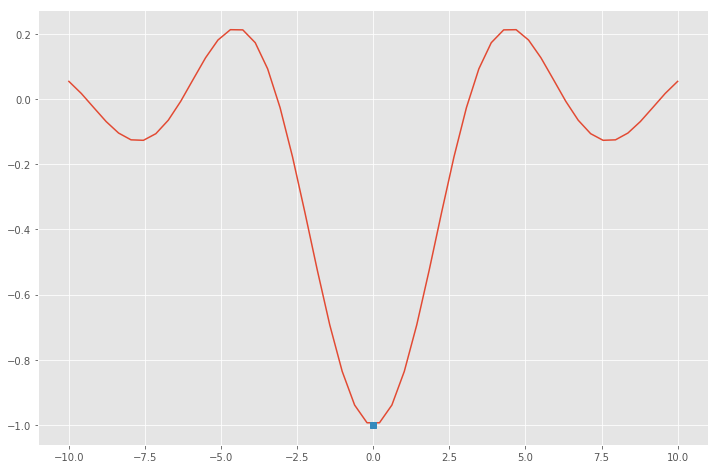

In [37]:
x = np.linspace(-10,10,50)
func = lambda x: -np.sin(x)/x
y = func(x)
plt.plot(x,y)

y_best = func(best['x'])
plt.plot(best['x'], y_best, marker='s')

Нашли)

Возвращаясь к нашим баранам, функция вданном случае будет возвращать метрику качества модели (пайплайна) на кроссвалидации. С помощью `hyperopt` мы будем искать минимум этой функции при заданных диаполознах значений гипер параметров.

Но самым важным плюсом, как по мне, является гибкость - в функцию, которую мы хотим минимизировать можно написать все что угодно. Например, сейчас я добавлю вариативность в пайплайне по типу шкалирования между - StandartScaler или RobustScaler.

In [38]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score

In [39]:
X = df_features.loc[:, idx_features].values
y = df_features.loc[:, ~idx_features].values.flatten()

In [40]:
def run_trials_template(X, y, params, evals=100):

    def hyperopt_cv(X, y, params):
        
        X_ = X.copy()
        
        # Отделяем параметры лог регрессии в отдельный словарь
        lm_params = {}
        for k, v in params.items():
            if k.startswith('glob'):
                continue                
            elif k.startswith('lm'):
                lm_params[k.split('_', 1)[1]] = v
        
        # Задаем шкалирование
        if params['scaler_type'] == 'standart':
            scaler = StandardScaler(with_mean=params['scaler_centering'])
        else:
            assert params['scaler_type'] == 'robust'
            scaler = RobustScaler(with_centering=params['scaler_centering'])
        
        # Создаем лог рег с нужными параметрами
        clf = LogisticRegression(**lm_params)
        
        # Итоговый пайплайн
        model = Pipeline([
            ('scaler', scaler),
            ('clf', clf)
        ])

        # Схема кросс-валидации
        n_splits = 5
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, 
                             random_state=RND_SEED)
        '''scores = cross_val_score(model, X_, y,
                                 scoring='roc_auc', 
                                 cv=cv, 
                                 n_jobs=-1)'''
        scores = cross_val_score(model, X_, y,
                                 scoring='roc_auc', 
                                 cv=cv)

        # Возвращаем среднее значение метрики и отклонение (на всякий случай)
        return scores.mean(), scores.std()

    def f(params):
        acc, std = hyperopt_cv(X, y, params)
        return {'loss': -acc, 'qscore': -acc, 'qscore_std': std, 'status': STATUS_OK}

    trials = Trials()
    best = fmin(f, 
                params, 
                algo=tpe.suggest, 
                max_evals=evals, 
                trials=trials, 
                verbose=1)
    
    return trials

In [41]:
# Задаем пространство поиска
space4_lm = {
    'lm_penalty': hp.choice('penalty', ['l1', 'l2']),
    'lm_C': hp.loguniform('C', -5, 3),
    'lm_class_weight': hp.choice('class_weight', [None, 'balanced']),
    'lm_random_state': RND_SEED,
    'scaler_type': hp.choice('scaler_type', ['standart', 'robust']),
    'scaler_centering': hp.choice('scaler_centering', [False, True])
}

In [42]:
# Запускаем поиск
trials = run_trials_template(X, y, space4_lm, evals=40)

In [43]:
def trials_df(trials):
    '''
    Функция форматирует результаты hyperopt в dataframe
    '''
    tr_dict = []
    for t in trials:
        trial = dict()
        for k, v in t['misc']['vals'].items():
            trial[k] = v[0]

        trial['qscore'] = -t['result']['qscore']
        trial['qscore_std'] = -t['result']['qscore_std']
        tr_dict.append(trial)

    df_res = pd.DataFrame.from_dict(tr_dict)
    df_res = df_res.sort_values('qscore', ascending=False)
    
    return df_res

Достаем результаты.

Стоит оговорится, что в некоторых столбцах указаны не фактические значение гиперпараметров, а их позиция в соответствуюем поле в `space4_lm`

In [44]:
df_trials = trials_df(trials)

Здесь `qscore` - метрика качесва, а `scaler_type = 1` означает, что был выбран `scaler_type = robust`

In [45]:
df_trials.head()

,C,class_weight,penalty,qscore,qscore_std,scaler_centering,scaler_type
21,0.023098,0,0,0.836928,-0.003666,0,1
31,0.023714,0,0,0.836923,-0.003648,0,1
22,0.021502,0,0,0.836867,-0.003826,0,1
7,0.029098,0,0,0.836801,-0.003352,1,1
26,0.018845,0,0,0.836771,-0.003960,0,1


## Ваш черед

### Новые признаки

Задание творческое - придумайте по новому признаку (группе признаков)
* На основе mcc (tr_type)
* На основе временного фактора
* На основе текстов из описания mcc

Реалиуйте их в функции, аналогичной `gen_features`.

In [46]:
df_transactions.head(2)

,customer_id,mcc_code,tr_type,amount,term_id,day,dt,weekday,datetime,date,hour
0,39026145,4814,1030,-100.0,NaN,0,1406888606,5,2014-08-01 10:23:26,2014-08-01,10
1,39026145,6011,7010,2500.0,NaN,1,1406974769,6,2014-08-02 10:19:29,2014-08-02,10


In [47]:
df_gender.head(2)

,customer_id,gender
0,75562265,0
1,10928546,1


In [48]:
df_tr.head(2)

,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...


In [49]:
df_mcc.head(2)

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."


Если бы надо было определять пол по одной транзакции:

------------------------------------------------
%%time
print('df_transactions:', df_transactions.shape)
print('df_gender:', df_gender.shape)
print('df_tr:', df_tr.shape)
print('df_mcc:', df_mcc.shape)
print('----------------------------')
print('df_transactions counts of customer_id:', pd.unique(df_transactions['customer_id'].values.ravel('K')).shape[0])
print('----------------------------------------------------------------')
print('df_transactions counts:', '\n', df_transactions.apply(lambda x: pd.unique(x.values.ravel('K')).shape[0], axis=0))
print('----------------------------')
print('df_gender counts:', '\n',       df_gender.apply(lambda x: pd.unique(x.values.ravel('K')).shape[0], axis=0))
print('----------------------------')
print('df_tr counts:', '\n',           df_tr.apply(lambda x: pd.unique(x.values.ravel('K')).shape[0], axis=0))
print('----------------------------')
print('df_mcc counts:', '\n',          df_mcc.apply(lambda x: pd.unique(x.values.ravel('K')).shape[0], axis=0))

--------------------------------------------------------------------------------
df_transactions.info()

---------------------------------------------------
%%time
df=pd.merge(df_transactions, df_gender , how='outer', on='customer_id').copy()
print('df counts:', '\n', df.apply(lambda x: pd.unique(x.values.ravel('K')).shape[0], axis=0))

---------------------------------------------------
print(df_gender['gender'].value_counts())
print(df_gender.count())
print(df['gender'].value_counts())
print(df.count())

---------------------------------------------------
%%time
df=pd.merge(df, df_tr , how='left', on='tr_type').copy()

---------------------------------------------------
%%time
df=pd.merge(df, df_mcc , how='left', on='mcc_code').copy()
print('df counts:', '\n', df.apply(lambda x: pd.unique(x.values.ravel('K')).shape[0], axis=0))

---------------------------------------------------
df=df.drop('dt', axis=1)
df.head(2)

---------------------------------------------------
df_features.head(1)

---------------------------------------------------
df_features.shape

---------------------------------------------------
(df.groupby(['customer_id'])['datetime'].max()-df.groupby(['customer_id'])['datetime'].min()).mean()

---------------------------------------------------
del df_transactions
del df_gender
del df_tr
del df_mcc
del df_features

---------------------------------------------------
Данные за последний месяц

%%time

df_hist30=pd.DataFrame(columns=['customer_id', 'mcc_code', 'tr_type', 'amount', 'term_id', 'day',
       'weekday', 'datetime', 'date', 'hour', 'gender', 'tr_description',
       'mcc_description', 'mcc_code_hist', 'tr_type_hist', 'amount_hist',
       'term_id_hist', 'day_hist', 'weekday_hist', 'datetime_hist',
       'date_hist', 'hour_hist', 'gender_hist', 'tr_description_hist',
       'mcc_description_hist'])

for cid in pd.unique(df['customer_id'])[:2]:
    df_hist30_cid=pd.merge(df[df['customer_id']==cid], df[df['customer_id']==cid], 
                       how='inner', on='customer_id', suffixes=('', '_hist')).copy()
    df_hist30_cid=df_hist30_cid[((df_hist30_cid['datetime']-df_hist30_cid['datetime_hist']).apply(lambda x:x.days+((x.seconds)/(60*60*24)))\
                                 >= 0)&\
                                ((df_hist30_cid['datetime']-df_hist30_cid['datetime_hist']).apply(lambda x:x.days+((x.seconds)/(60*60*24)))\
                                 <= 30)]
    df_hist30=df_hist30.append(df_hist30_cid, ignore_index=True).copy()
    
--------------------------------------------
    
df_hist30_mcc=pd.merge(pd.DataFrame(df_hist30.groupby(['customer_id', 'datetime', 'mcc_code_hist']).size(), 
         columns=['cnt_mcc']).reset_index(level=0).reset_index(level=0).reset_index(level=0), 
     pd.DataFrame(df_hist30.groupby(['customer_id', 'datetime']).size(), 
          columns=['cnt_all']).reset_index(level=0).reset_index(level=0), 
                   how='inner', on=['customer_id', 'datetime']).copy()

df_hist30_mcc['perc_mcc']=df_hist30_mcc['cnt_mcc']*100/df_hist30_mcc['cnt_all']

df_hist30_mcc = \
    df_hist30_mcc.pivot_table(index=['customer_id', 'datetime'], columns='mcc_code_hist', values='perc_mcc', 
                         aggfunc=np.max, fill_value=0)

df_hist30_mcc = df_hist30_mcc.rename_axis(lambda x: 'mcc_{}_perc_hist30'.format(x), axis=1).reset_index(level=0).reset_index(level=0)

--------------------------------------------

df_hist30_tr=pd.merge(pd.DataFrame(df_hist30.groupby(['customer_id', 'datetime', 'tr_type_hist']).size(), 
         columns=['cnt_tr']).reset_index(level=0).reset_index(level=0).reset_index(level=0), 
     pd.DataFrame(df_hist30.groupby(['customer_id', 'datetime']).size(), 
          columns=['cnt_all']).reset_index(level=0).reset_index(level=0), 
                   how='inner', on=['customer_id', 'datetime']).copy()

df_hist30_tr['perc_tr']=df_hist30_tr['cnt_tr']*100/df_hist30_tr['cnt_all']

df_hist30_tr = \
    df_hist30_tr.pivot_table(index=['customer_id', 'datetime'], columns='tr_type_hist', values='perc_tr', 
                         aggfunc=np.max, fill_value=0)

df_hist30_tr = df_hist30_tr.rename_axis(lambda x: 'tr_{}_perc_hist30'.format(x), axis=1).reset_index(level=0).reset_index(level=0)

--------------------------------------------
  

Доля по суммам, затраченным на каждый код mcc (общее значение: положительные + отрицательные)

In [50]:
'''df_mcc_amount_plus = \
pd.merge(df_transactions[df_transactions['amount'] > 0].pivot_table(index=['customer_id'], 
                                                           columns='mcc_code', values='amount', aggfunc=np.sum, 
                            fill_value=0).rename_axis(lambda x: 'mcc_{}_amount+'.format(x), axis=1).reset_index(level=0),
         pd.DataFrame(df_transactions[df_transactions['amount'] > 0].groupby('customer_id')['amount'].sum()).reset_index(level=0),
         how='inner', on = 'customer_id').copy()
for column_name in df_mcc_amount_plus.columns:
    if column_name!='customer_id' and column_name!='amount':
        df_mcc_amount_plus[column_name] = df_mcc_amount_plus[column_name]*100/df_mcc_amount_plus['amount']'''

"df_mcc_amount_plus = pd.merge(df_transactions[df_transactions['amount'] > 0].pivot_table(index=['customer_id'], \n                                                           columns='mcc_code', values='amount', aggfunc=np.sum, \n                            fill_value=0).rename_axis(lambda x: 'mcc_{}_amount+'.format(x), axis=1).reset_index(level=0),\n         pd.DataFrame(df_transactions[df_transactions['amount'] > 0].groupby('customer_id')['amount'].sum()).reset_index(level=0),\n         how='inner', on = 'customer_id').copy()\nfor column_name in df_mcc_amount_plus.columns:\n    if column_name!='customer_id' and column_name!='amount':\n        df_mcc_amount_plus[column_name] = df_mcc_amount_plus[column_name]*100/df_mcc_amount_plus['amount']"

In [51]:
'''df_mcc_amount_minus = \
pd.merge(df_transactions[df_transactions['amount'] <= 0].pivot_table(index=['customer_id'], 
                                                           columns='mcc_code', values='amount', aggfunc=np.sum, 
                            fill_value=0).rename_axis(lambda x: 'mcc_{}_amount-'.format(x), axis=1).reset_index(level=0),
         pd.DataFrame(df_transactions[df_transactions['amount'] <= 0].groupby('customer_id')['amount'].sum()).reset_index(level=0),
         how='inner', on = 'customer_id').copy()

for column_name in df_mcc_amount_minus.columns:
    if column_name!='customer_id' and column_name!='amount':
        df_mcc_amount_minus[column_name] = (df_mcc_amount_minus[column_name]*100/df_mcc_amount_minus['amount']).apply(lambda x: np.abs(x))'''

"df_mcc_amount_minus = pd.merge(df_transactions[df_transactions['amount'] <= 0].pivot_table(index=['customer_id'], \n                                                           columns='mcc_code', values='amount', aggfunc=np.sum, \n                            fill_value=0).rename_axis(lambda x: 'mcc_{}_amount-'.format(x), axis=1).reset_index(level=0),\n         pd.DataFrame(df_transactions[df_transactions['amount'] <= 0].groupby('customer_id')['amount'].sum()).reset_index(level=0),\n         how='inner', on = 'customer_id').copy()\n\nfor column_name in df_mcc_amount_minus.columns:\n    if column_name!='customer_id' and column_name!='amount':\n        df_mcc_amount_minus[column_name] = (df_mcc_amount_minus[column_name]*100/df_mcc_amount_minus['amount']).apply(lambda x: np.abs(x))"

Доля по суммам, затраченным на каждый tr_type

In [52]:
'''df_tr_amount_plus = \
pd.merge(df_transactions[df_transactions['amount'] > 0].pivot_table(index=['customer_id'], 
                                                           columns='tr_type', values='amount', aggfunc=np.sum, 
                            fill_value=0).rename_axis(lambda x: 'tr_{}_amount+'.format(x), axis=1).reset_index(level=0),
         pd.DataFrame(df_transactions[df_transactions['amount'] > 0].groupby('customer_id')['amount'].sum()).reset_index(level=0),
         how='inner', on = 'customer_id').copy()
for column_name in df_tr_amount_plus.columns:
    if column_name!='customer_id' and column_name!='amount':
        df_tr_amount_plus[column_name] = df_tr_amount_plus[column_name]*100/df_tr_amount_plus['amount']'''

"df_tr_amount_plus = pd.merge(df_transactions[df_transactions['amount'] > 0].pivot_table(index=['customer_id'], \n                                                           columns='tr_type', values='amount', aggfunc=np.sum, \n                            fill_value=0).rename_axis(lambda x: 'tr_{}_amount+'.format(x), axis=1).reset_index(level=0),\n         pd.DataFrame(df_transactions[df_transactions['amount'] > 0].groupby('customer_id')['amount'].sum()).reset_index(level=0),\n         how='inner', on = 'customer_id').copy()\nfor column_name in df_tr_amount_plus.columns:\n    if column_name!='customer_id' and column_name!='amount':\n        df_tr_amount_plus[column_name] = df_tr_amount_plus[column_name]*100/df_tr_amount_plus['amount']"

In [53]:
'''df_tr_amount_minus = \
pd.merge(df_transactions[df_transactions['amount'] <= 0].pivot_table(index=['customer_id'], 
                                                           columns='tr_type', values='amount', aggfunc=np.sum, 
                            fill_value=0).rename_axis(lambda x: 'tr_{}_amount-'.format(x), axis=1).reset_index(level=0),
         pd.DataFrame(df_transactions[df_transactions['amount'] <= 0].groupby('customer_id')['amount'].sum()).reset_index(level=0),
         how='inner', on = 'customer_id').copy()

for column_name in df_tr_amount_minus.columns:
    if column_name!='customer_id' and column_name!='amount':
        df_tr_amount_minus[column_name] = (df_tr_amount_minus[column_name]*100/\
                                           df_tr_amount_minus['amount']).apply(lambda x: np.abs(x))'''

"df_tr_amount_minus = pd.merge(df_transactions[df_transactions['amount'] <= 0].pivot_table(index=['customer_id'], \n                                                           columns='tr_type', values='amount', aggfunc=np.sum, \n                            fill_value=0).rename_axis(lambda x: 'tr_{}_amount-'.format(x), axis=1).reset_index(level=0),\n         pd.DataFrame(df_transactions[df_transactions['amount'] <= 0].groupby('customer_id')['amount'].sum()).reset_index(level=0),\n         how='inner', on = 'customer_id').copy()\n\nfor column_name in df_tr_amount_minus.columns:\n    if column_name!='customer_id' and column_name!='amount':\n        df_tr_amount_minus[column_name] = (df_tr_amount_minus[column_name]*100/                                           df_tr_amount_minus['amount']).apply(lambda x: np.abs(x))"

Средняя доля положительных транзакций в день по клиенту

In [54]:
'''df_amount_plus =\
pd.merge(pd.DataFrame(df_transactions.groupby(['customer_id', 'date']).size(), 
                      columns = ['cnt_amount']).reset_index(level=0).reset_index(level=0),
         pd.DataFrame(df_transactions[df_transactions['amount'] > 0].groupby(['customer_id', 'date']).size(), 
                      columns = ['cnt_amount+']).reset_index(level=0).reset_index(level=0), 
         how = 'left', on = ['customer_id', 'date']
        ).fillna(0).copy()
df_amount_plus['perc_amount+']=df_amount_plus['cnt_amount+']*100/df_amount_plus['cnt_amount']

df_amount_plus =\
pd.DataFrame(df_amount_plus.groupby(['customer_id'])['perc_amount+'].mean()).reset_index(level=0)'''

"df_amount_plus =pd.merge(pd.DataFrame(df_transactions.groupby(['customer_id', 'date']).size(), \n                      columns = ['cnt_amount']).reset_index(level=0).reset_index(level=0),\n         pd.DataFrame(df_transactions[df_transactions['amount'] > 0].groupby(['customer_id', 'date']).size(), \n                      columns = ['cnt_amount+']).reset_index(level=0).reset_index(level=0), \n         how = 'left', on = ['customer_id', 'date']\n        ).fillna(0).copy()\ndf_amount_plus['perc_amount+']=df_amount_plus['cnt_amount+']*100/df_amount_plus['cnt_amount']\n\ndf_amount_plus =pd.DataFrame(df_amount_plus.groupby(['customer_id'])['perc_amount+'].mean()).reset_index(level=0)"

Средняя сумма в день по клиенту

In [55]:
'''df_amount_mean =\
pd.DataFrame(pd.DataFrame(df_transactions.groupby(['customer_id', \
                                      'date'])['amount'].sum()).reset_index(level=0).reset_index(level=0)\
             .groupby(['customer_id'])['amount'].mean()).reset_index(level=0)'''

"df_amount_mean =pd.DataFrame(pd.DataFrame(df_transactions.groupby(['customer_id',                                       'date'])['amount'].sum()).reset_index(level=0).reset_index(level=0)             .groupby(['customer_id'])['amount'].mean()).reset_index(level=0)"

Средняя положительная сумма в день по клиенту

In [56]:
'''df_amount_mean_plus =\
pd.DataFrame(pd.DataFrame(df_transactions[df_transactions['amount'] > 0].groupby(['customer_id', \
                                      'date'])['amount'].sum()).reset_index(level=0).reset_index(level=0)\
             .groupby(['customer_id'])['amount'].mean()).reset_index(level=0)'''

"df_amount_mean_plus =pd.DataFrame(pd.DataFrame(df_transactions[df_transactions['amount'] > 0].groupby(['customer_id',                                       'date'])['amount'].sum()).reset_index(level=0).reset_index(level=0)             .groupby(['customer_id'])['amount'].mean()).reset_index(level=0)"

Средняя отрицательная сумма в день по клиенту

In [57]:
'''df_amount_mean_minus =\
pd.DataFrame(pd.DataFrame(df_transactions[df_transactions['amount'] <= 0].groupby(['customer_id', \
                                      'date'])['amount'].sum()).reset_index(level=0).reset_index(level=0)\
             .groupby(['customer_id'])['amount'].mean()).reset_index(level=0)'''

"df_amount_mean_minus =pd.DataFrame(pd.DataFrame(df_transactions[df_transactions['amount'] <= 0].groupby(['customer_id',                                       'date'])['amount'].sum()).reset_index(level=0).reset_index(level=0)             .groupby(['customer_id'])['amount'].mean()).reset_index(level=0)"

w2v for mcc

In [58]:
'''df_mcc.head(2)'''

'df_mcc.head(2)'

In [59]:
'''import re
import pymorphy2

morph=pymorphy2.MorphAnalyzer()
mcc_list=list(df_mcc['mcc_description'].\
              apply(lambda x: [a[0].lower() for a in re.findall("(([А-ЯЁа-яё]+(-[А-ЯЁа-яё]+)*)|([A-za-z]+(-[A-za-z]+)*))", x)]))

mcc_list_NF=list()
for text in mcc_list:
    text_list=list()
    for word in text:
        text_list.append(morph.parse(word)[0].normal_form)
    mcc_list_NF.append(text_list)'''

'import re\nimport pymorphy2\n\nmorph=pymorphy2.MorphAnalyzer()\nmcc_list=list(df_mcc[\'mcc_description\'].              apply(lambda x: [a[0].lower() for a in re.findall("(([А-ЯЁа-яё]+(-[А-ЯЁа-яё]+)*)|([A-za-z]+(-[A-za-z]+)*))", x)]))\n\nmcc_list_NF=list()\nfor text in mcc_list:\n    text_list=list()\n    for word in text:\n        text_list.append(morph.parse(word)[0].normal_form)\n    mcc_list_NF.append(text_list)'

In [60]:
'''%%time
from gensim.models.word2vec import Word2Vec 

num_features   = 30   # итоговая размерность вектора каждого слова
min_word_count = 1    # минимальная частотность слова, чтобы оно попало в модель
num_workers    = 8    # количество ядер вашего процессора, чтоб запустить обучение в несколько потоков
context        = 10   # размер окна 
downsampling   = 1e-3 # внутренняя метрика модели

model_mcc = Word2Vec(mcc_list_NF, workers=num_workers, size=num_features,
                 min_count=min_word_count, window=context, sample=downsampling)'''

'%%time\nfrom gensim.models.word2vec import Word2Vec \n\nnum_features   = 30   # итоговая размерность вектора каждого слова\nmin_word_count = 1    # минимальная частотность слова, чтобы оно попало в модель\nnum_workers    = 8    # количество ядер вашего процессора, чтоб запустить обучение в несколько потоков\ncontext        = 10   # размер окна \ndownsampling   = 1e-3 # внутренняя метрика модели\n\nmodel_mcc = Word2Vec(mcc_list_NF, workers=num_workers, size=num_features,\n                 min_count=min_word_count, window=context, sample=downsampling)'

In [61]:
'''model_mcc.init_sims(replace=True)'''

'model_mcc.init_sims(replace=True)'

In [62]:
'''model_mcc.wv.index2word[:10]'''

'model_mcc.wv.index2word[:10]'

In [63]:
'''model_mcc.most_similar('услуга')'''

"model_mcc.most_similar('услуга')"

In [64]:
'''import numpy as np

def text_to_vec(words, model, size):
    text_vec = np.zeros((size,), dtype="float32")
    n_words = 0

    index2word_set = set(model.wv.index2word)
    for word in words:
        if word in index2word_set:
            n_words = n_words + 1
            text_vec = np.add(text_vec, model[word])
    
    if n_words != 0:
        text_vec /= n_words
    return text_vec

def texts_to_vecs(texts, model, size):
    texts_vecs = np.zeros((len(texts), size), dtype="float32")
    
    for i, text in enumerate(texts):
        texts_vecs[i] = text_to_vec(text, model, size)

    return texts_vecs'''

'import numpy as np\n\ndef text_to_vec(words, model, size):\n    text_vec = np.zeros((size,), dtype="float32")\n    n_words = 0\n\n    index2word_set = set(model.wv.index2word)\n    for word in words:\n        if word in index2word_set:\n            n_words = n_words + 1\n            text_vec = np.add(text_vec, model[word])\n    \n    if n_words != 0:\n        text_vec /= n_words\n    return text_vec\n\ndef texts_to_vecs(texts, model, size):\n    texts_vecs = np.zeros((len(texts), size), dtype="float32")\n    \n    for i, text in enumerate(texts):\n        texts_vecs[i] = text_to_vec(text, model, size)\n\n    return texts_vecs'

In [65]:
'''mcc_vecs = texts_to_vecs(mcc_list_NF, model_mcc, num_features)'''

'mcc_vecs = texts_to_vecs(mcc_list_NF, model_mcc, num_features)'

In [66]:
'''df_mcc_vecs=pd.DataFrame(mcc_vecs, columns=['mcc_1', 'mcc_2', 'mcc_3', 'mcc_4', 'mcc_5', 'mcc_6', 'mcc_7', 
                                            'mcc_8', 'mcc_9', 'mcc_10', 'mcc_11', 'mcc_12', 'mcc_13', 'mcc_14', 
                                            'mcc_15', 'mcc_16', 'mcc_17', 'mcc_18', 'mcc_19', 'mcc_20', 
                                            'mcc_21', 'mcc_22', 'mcc_23', 'mcc_24', 'mcc_25', 'mcc_26', 'mcc_27', 
                                            'mcc_28', 'mcc_29', 'mcc_30'])
df_mcc_vecs=pd.concat([df_mcc, df_mcc_vecs], axis=1).copy()
df_mcc_vecs=pd.merge(df_transactions, df_mcc_vecs, how='inner', on='mcc_code').copy()
df_mcc_vecs=pd.DataFrame(df_mcc_vecs[['customer_id', 'mcc_1', 'mcc_2', 'mcc_3', 'mcc_4', 'mcc_5', 'mcc_6', 'mcc_7', 
                                            'mcc_8', 'mcc_9', 'mcc_10', 'mcc_11', 'mcc_12', 'mcc_13', 'mcc_14', 
                                            'mcc_15', 'mcc_16', 'mcc_17', 'mcc_18', 'mcc_19', 'mcc_20', 
                                            'mcc_21', 'mcc_22', 'mcc_23', 'mcc_24', 'mcc_25', 'mcc_26', 'mcc_27', 
                                            'mcc_28', 'mcc_29', 'mcc_30']].groupby('customer_id').sum()).reset_index(level=0)
df_mcc_vecs=pd.merge(df_mcc_vecs, 
                     pd.DataFrame(df_transactions.groupby('customer_id').size(), columns=['cnt']).reset_index(level=0),
                     how='inner', on='customer_id').copy()
for column_name in ['mcc_1', 'mcc_2', 'mcc_3', 'mcc_4', 'mcc_5', 'mcc_6', 'mcc_7', 
                                            'mcc_8', 'mcc_9', 'mcc_10', 'mcc_11', 'mcc_12', 'mcc_13', 'mcc_14', 
                                            'mcc_15', 'mcc_16', 'mcc_17', 'mcc_18', 'mcc_19', 'mcc_20', 
                                            'mcc_21', 'mcc_22', 'mcc_23', 'mcc_24', 'mcc_25', 'mcc_26', 'mcc_27', 
                                            'mcc_28', 'mcc_29', 'mcc_30']:
    df_mcc_vecs[column_name] = df_mcc_vecs[column_name]/df_mcc_vecs['cnt']'''

"df_mcc_vecs=pd.DataFrame(mcc_vecs, columns=['mcc_1', 'mcc_2', 'mcc_3', 'mcc_4', 'mcc_5', 'mcc_6', 'mcc_7', \n                                            'mcc_8', 'mcc_9', 'mcc_10', 'mcc_11', 'mcc_12', 'mcc_13', 'mcc_14', \n                                            'mcc_15', 'mcc_16', 'mcc_17', 'mcc_18', 'mcc_19', 'mcc_20', \n                                            'mcc_21', 'mcc_22', 'mcc_23', 'mcc_24', 'mcc_25', 'mcc_26', 'mcc_27', \n                                            'mcc_28', 'mcc_29', 'mcc_30'])\ndf_mcc_vecs=pd.concat([df_mcc, df_mcc_vecs], axis=1).copy()\ndf_mcc_vecs=pd.merge(df_transactions, df_mcc_vecs, how='inner', on='mcc_code').copy()\ndf_mcc_vecs=pd.DataFrame(df_mcc_vecs[['customer_id', 'mcc_1', 'mcc_2', 'mcc_3', 'mcc_4', 'mcc_5', 'mcc_6', 'mcc_7', \n                                            'mcc_8', 'mcc_9', 'mcc_10', 'mcc_11', 'mcc_12', 'mcc_13', 'mcc_14', \n                                            'mcc_15', 'mcc_16', 'mcc_17', 'mcc_18', 'mcc_19', 'mcc

In [67]:
import numpy as np
import re
import pymorphy2
from gensim.models.word2vec import Word2Vec 

def text_to_vec(words, model, size):
    text_vec = np.zeros((size,), dtype="float32")
    n_words = 0

    index2word_set = set(model.wv.index2word)
    for word in words:
        if word in index2word_set:
            n_words = n_words + 1
            text_vec = np.add(text_vec, model[word])
    
    if n_words != 0:
        text_vec /= n_words
    return text_vec

def texts_to_vecs(texts, model, size):
    texts_vecs = np.zeros((len(texts), size), dtype="float32")
    
    for i, text in enumerate(texts):
        texts_vecs[i] = text_to_vec(text, model, size)

    return texts_vecs

def gen_features_2(df_gender, df_transactions):
    
    
    df_mcc_amount_plus = \
    pd.merge(df_transactions[df_transactions['amount'] > 0].pivot_table(index=['customer_id'], 
                                                               columns='mcc_code', values='amount', aggfunc=np.sum, 
                                fill_value=0).rename_axis(lambda x: 'mcc_{}_amount+'.format(x), axis=1).reset_index(level=0),
             pd.DataFrame(df_transactions[df_transactions['amount'] > 0].groupby('customer_id')['amount'].sum()).reset_index(level=0),
             how='inner', on = 'customer_id').copy()
    for column_name in df_mcc_amount_plus.columns:
        if column_name!='customer_id' and column_name!='amount':
            df_mcc_amount_plus[column_name] = df_mcc_amount_plus[column_name]*100/df_mcc_amount_plus['amount']

    df_mcc_amount_minus = \
    pd.merge(df_transactions[df_transactions['amount'] <= 0].pivot_table(index=['customer_id'], 
                                                               columns='mcc_code', values='amount', aggfunc=np.sum, 
                                fill_value=0).rename_axis(lambda x: 'mcc_{}_amount-'.format(x), axis=1).reset_index(level=0),
             pd.DataFrame(df_transactions[df_transactions['amount'] <= 0].groupby('customer_id')['amount'].sum()).reset_index(level=0),
             how='inner', on = 'customer_id').copy()

    for column_name in df_mcc_amount_minus.columns:
        if column_name!='customer_id' and column_name!='amount':
            df_mcc_amount_minus[column_name] = (df_mcc_amount_minus[column_name]*100/df_mcc_amount_minus['amount']).apply(lambda x: np.abs(x))

    df_tr_amount_plus = \
    pd.merge(df_transactions[df_transactions['amount'] > 0].pivot_table(index=['customer_id'], 
                                                               columns='tr_type', values='amount', aggfunc=np.sum, 
                                fill_value=0).rename_axis(lambda x: 'tr_{}_amount+'.format(x), axis=1).reset_index(level=0),
             pd.DataFrame(df_transactions[df_transactions['amount'] > 0].groupby('customer_id')['amount'].sum()).reset_index(level=0),
             how='inner', on = 'customer_id').copy()
    for column_name in df_tr_amount_plus.columns:
        if column_name!='customer_id' and column_name!='amount':
            df_tr_amount_plus[column_name] = df_tr_amount_plus[column_name]*100/df_tr_amount_plus['amount']

    df_tr_amount_minus = \
    pd.merge(df_transactions[df_transactions['amount'] <= 0].pivot_table(index=['customer_id'], 
                                                               columns='tr_type', values='amount', aggfunc=np.sum, 
                                fill_value=0).rename_axis(lambda x: 'tr_{}_amount-'.format(x), axis=1).reset_index(level=0),
             pd.DataFrame(df_transactions[df_transactions['amount'] <= 0].groupby('customer_id')['amount'].sum()).reset_index(level=0),
             how='inner', on = 'customer_id').copy()

    for column_name in df_tr_amount_minus.columns:
        if column_name!='customer_id' and column_name!='amount':
            df_tr_amount_minus[column_name] = (df_tr_amount_minus[column_name]*100/\
                                               df_tr_amount_minus['amount']).apply(lambda x: np.abs(x))

    df_amount_plus =\
    pd.merge(pd.DataFrame(df_transactions.groupby(['customer_id', 'date']).size(), 
                          columns = ['cnt_amount']).reset_index(level=0).reset_index(level=0),
             pd.DataFrame(df_transactions[df_transactions['amount'] > 0].groupby(['customer_id', 'date']).size(), 
                          columns = ['cnt_amount+']).reset_index(level=0).reset_index(level=0), 
             how = 'left', on = ['customer_id', 'date']
            ).fillna(0).copy()
    df_amount_plus['perc_amount+']=df_amount_plus['cnt_amount+']*100/df_amount_plus['cnt_amount']

    df_amount_plus =\
    pd.DataFrame(df_amount_plus.groupby(['customer_id'])['perc_amount+'].mean()).reset_index(level=0)


    df_amount_mean =\
    pd.DataFrame(pd.DataFrame(df_transactions.groupby(['customer_id', \
                                          'date'])['amount'].sum()).reset_index(level=0).reset_index(level=0)\
                 .groupby(['customer_id'])['amount'].mean()).reset_index(level=0)
    df_amount_mean.columns = ['customer_id', 'amount_mean']


    df_amount_mean_plus =\
    pd.DataFrame(pd.DataFrame(df_transactions[df_transactions['amount'] > 0].groupby(['customer_id', \
                                          'date'])['amount'].sum()).reset_index(level=0).reset_index(level=0)\
                 .groupby(['customer_id'])['amount'].mean()).reset_index(level=0)
    df_amount_mean_plus.columns = ['customer_id', 'amount_mean_plus']


    df_amount_mean_minus =\
    pd.DataFrame(pd.DataFrame(df_transactions[df_transactions['amount'] <= 0].groupby(['customer_id', \
                                          'date'])['amount'].sum()).reset_index(level=0).reset_index(level=0)\
                 .groupby(['customer_id'])['amount'].mean()).reset_index(level=0)
    df_amount_mean_minus.columns = ['customer_id', 'amount_mean_minus']


    morph=pymorphy2.MorphAnalyzer()

    num_features   = 30   # итоговая размерность вектора каждого слова
    min_word_count = 1    # минимальная частотность слова, чтобы оно попало в модель
    num_workers    = 8    # количество ядер вашего процессора, чтоб запустить обучение в несколько потоков
    context        = 10   # размер окна 
    downsampling   = 1e-3 # внутренняя метрика модели

    mcc_list=list(df_mcc['mcc_description'].\
                  apply(lambda x: [a[0].lower() for a in re.findall("(([А-ЯЁа-яё]+(-[А-ЯЁа-яё]+)*)|([A-za-z]+(-[A-za-z]+)*))", x)]))

    mcc_list_NF=list()
    for text in mcc_list:
        text_list=list()
        for word in text:
            text_list.append(morph.parse(word)[0].normal_form)
        mcc_list_NF.append(text_list)

    model_mcc = Word2Vec(mcc_list_NF, workers=num_workers, size=num_features,
                     min_count=min_word_count, window=context, sample=downsampling)

    model_mcc.init_sims(replace=True)

    mcc_vecs = texts_to_vecs(mcc_list_NF, model_mcc, num_features)

    df_mcc_vecs=pd.DataFrame(mcc_vecs, columns=['mcc_1', 'mcc_2', 'mcc_3', 'mcc_4', 'mcc_5', 'mcc_6', 'mcc_7', 
                                                'mcc_8', 'mcc_9', 'mcc_10', 'mcc_11', 'mcc_12', 'mcc_13', 'mcc_14', 
                                                'mcc_15', 'mcc_16', 'mcc_17', 'mcc_18', 'mcc_19', 'mcc_20', 
                                                'mcc_21', 'mcc_22', 'mcc_23', 'mcc_24', 'mcc_25', 'mcc_26', 'mcc_27', 
                                                'mcc_28', 'mcc_29', 'mcc_30'])
    df_mcc_vecs=pd.concat([df_mcc, df_mcc_vecs], axis=1).copy()
    df_mcc_vecs=pd.merge(df_transactions, df_mcc_vecs, how='inner', on='mcc_code').copy()
    df_mcc_vecs=pd.DataFrame(df_mcc_vecs[['customer_id', 'mcc_1', 'mcc_2', 'mcc_3', 'mcc_4', 'mcc_5', 'mcc_6', 'mcc_7', 
                                                'mcc_8', 'mcc_9', 'mcc_10', 'mcc_11', 'mcc_12', 'mcc_13', 'mcc_14', 
                                                'mcc_15', 'mcc_16', 'mcc_17', 'mcc_18', 'mcc_19', 'mcc_20', 
                                                'mcc_21', 'mcc_22', 'mcc_23', 'mcc_24', 'mcc_25', 'mcc_26', 'mcc_27', 
                                                'mcc_28', 'mcc_29', 'mcc_30']].groupby('customer_id').sum()).reset_index(level=0)
    df_mcc_vecs=pd.merge(df_mcc_vecs, 
                         pd.DataFrame(df_transactions.groupby('customer_id').size(), columns=['cnt']).reset_index(level=0),
                         how='inner', on='customer_id').copy()
    for column_name in ['mcc_1', 'mcc_2', 'mcc_3', 'mcc_4', 'mcc_5', 'mcc_6', 'mcc_7', 
                                                'mcc_8', 'mcc_9', 'mcc_10', 'mcc_11', 'mcc_12', 'mcc_13', 'mcc_14', 
                                                'mcc_15', 'mcc_16', 'mcc_17', 'mcc_18', 'mcc_19', 'mcc_20', 
                                                'mcc_21', 'mcc_22', 'mcc_23', 'mcc_24', 'mcc_25', 'mcc_26', 'mcc_27', 
                                                'mcc_28', 'mcc_29', 'mcc_30']:
        df_mcc_vecs[column_name] = df_mcc_vecs[column_name]/df_mcc_vecs['cnt']

    tr_list=list(df_tr['tr_description'].\
                  apply(lambda x: [a[0].lower() for a in re.findall("(([А-ЯЁа-яё]+(-[А-ЯЁа-яё]+)*)|([A-za-z]+(-[A-za-z]+)*))", x)]))

    tr_list_NF=list()
    for text in tr_list:
        text_list=list()
        for word in text:
            text_list.append(morph.parse(word)[0].normal_form)
        tr_list_NF.append(text_list)

    model_tr = Word2Vec(tr_list_NF, workers=num_workers, size=num_features,
                     min_count=min_word_count, window=context, sample=downsampling)

    model_tr.init_sims(replace=True)

    tr_vecs = texts_to_vecs(tr_list_NF, model_tr, num_features)

    df_tr_vecs=pd.DataFrame(tr_vecs, columns=['tr_1', 'tr_2', 'tr_3', 'tr_4', 'tr_5', 'tr_6', 'tr_7', 
                                                'tr_8', 'tr_9', 'tr_10', 'tr_11', 'tr_12', 'tr_13', 'tr_14', 
                                                'tr_15', 'tr_16', 'tr_17', 'tr_18', 'tr_19', 'tr_20', 
                                                'tr_21', 'tr_22', 'tr_23', 'tr_24', 'tr_25', 'tr_26', 'tr_27', 
                                                'tr_28', 'tr_29', 'tr_30'])
    df_tr_vecs=pd.concat([df_tr, df_tr_vecs], axis=1).copy()
    df_tr_vecs=pd.merge(df_transactions, df_tr_vecs, how='inner', on='tr_type').copy()
    df_tr_vecs=pd.DataFrame(df_tr_vecs[['customer_id', 'tr_1', 'tr_2', 'tr_3', 'tr_4', 'tr_5', 'tr_6', 'tr_7', 
                                                'tr_8', 'tr_9', 'tr_10', 'tr_11', 'tr_12', 'tr_13', 'tr_14', 
                                                'tr_15', 'tr_16', 'tr_17', 'tr_18', 'tr_19', 'tr_20', 
                                                'tr_21', 'tr_22', 'tr_23', 'tr_24', 'tr_25', 'tr_26', 'tr_27', 
                                                'tr_28', 'tr_29', 'tr_30']].groupby('customer_id').sum()).reset_index(level=0)
    df_tr_vecs=pd.merge(df_tr_vecs, 
                         pd.DataFrame(df_transactions.groupby('customer_id').size(), columns=['cnt']).reset_index(level=0),
                         how='inner', on='customer_id').copy()
    for column_name in ['tr_1', 'tr_2', 'tr_3', 'tr_4', 'tr_5', 'tr_6', 'tr_7', 
                                                'tr_8', 'tr_9', 'tr_10', 'tr_11', 'tr_12', 'tr_13', 'tr_14', 
                                                'tr_15', 'tr_16', 'tr_17', 'tr_18', 'tr_19', 'tr_20', 
                                                'tr_21', 'tr_22', 'tr_23', 'tr_24', 'tr_25', 'tr_26', 'tr_27', 
                                                'tr_28', 'tr_29', 'tr_30']:
        df_tr_vecs[column_name] = df_tr_vecs[column_name]/df_tr_vecs['cnt']

   
    df_features = pd.merge(df_gender, df_mcc_amount_plus.drop('amount', axis=1)
                           , on='customer_id', how='left')
    df_features = pd.merge(df_features, df_mcc_amount_minus.drop('amount', axis=1)
                           , on='customer_id', how='left')
    df_features = pd.merge(df_features, df_tr_amount_plus.drop('amount', axis=1)
                           , on='customer_id', how='left')
    df_features = pd.merge(df_features, df_tr_amount_minus.drop('amount', axis=1)
                           , on='customer_id', how='left')
    df_features = pd.merge(df_features, df_amount_plus
                           , on='customer_id', how='left')
    df_features = pd.merge(df_features, df_amount_mean
                           , on='customer_id', how='left')
    df_features = pd.merge(df_features, df_amount_mean_plus
                           , on='customer_id', how='left')
    df_features = pd.merge(df_features, df_amount_mean_minus
                           , on='customer_id', how='left')
    df_features = pd.merge(df_features, df_mcc_vecs.drop('cnt', axis=1)
                           , on='customer_id', how='left')
    df_features = pd.merge(df_features, df_tr_vecs.drop('cnt', axis=1)
                           , on='customer_id', how='left')
    
    
    return df_features

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [68]:
%%time
df_features = df_gender.pipe(gen_features_2, df_transactions)
df_features = df_features.drop('customer_id', axis=1).copy()
label = 'gender'
idx_features = df_features.columns != label
X = df_features.loc[:, idx_features].fillna(0).values
y = df_features.loc[:, ~idx_features].values.flatten()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:33: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:42: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:52: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:61: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Wall time: 2min 48s


## Поиск гиперпараметров

Реализуйте функцию для hyperopt по перебору гипер параметров вашего пайплайна

На всякий случай почитайте еще про [`FeatureUnion`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html) и [пример](http://scikit-learn.org/stable/auto_examples/hetero_feature_union.html#sphx-glr-auto-examples-hetero-feature-union-py)

In [69]:
# А это трансформер, который выбирает подможнество столбцов из матрицы X
# Который нужен для того, чтобы делать какие-то действия только для подмноества столбцов, а потом объединять результаты
# Через FeatureUnion

from sklearn.base import BaseEstimator, TransformerMixin

class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, col_idx):
        self.col_idx = col_idx
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[:, self.col_idx]

In [70]:
from sklearn.tree import DecisionTreeClassifier

def run_trials_template(X, y, params, evals=100):

    def hyperopt_cv(X, y, params):
        
        X_ = X.copy()
        
        tr_params = {}
        for k, v in params.items():
            if k.startswith('glob'):
                continue                
            elif k.startswith('tr'):
                tr_params[k.split('_', 1)[1]] = v
        
        
        scaler = StandardScaler(with_mean=False)
        
        clf = DecisionTreeClassifier(**tr_params)
        
        model = Pipeline([
            ('scaler', scaler),
            ('clf', clf)
        ])

        n_splits = 5
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, 
                             random_state=RND_SEED)
        scores = cross_val_score(model, X_, y,
                                 scoring='roc_auc', 
                                 cv=cv)

        return scores.mean(), scores.std()

    def f(params):
        acc, std = hyperopt_cv(X, y, params)
        return {'loss': -acc, 'qscore': -acc, 'qscore_std': std, 'status': STATUS_OK}

    trials = Trials()
    best = fmin(f, 
                params, 
                algo=tpe.suggest, 
                max_evals=evals, 
                trials=trials)
    
    return trials

In [71]:
%%time
space4_tr = {
    'tr_criterion': hp.choice('criterion', ['gini', 'entropy']),
    'tr_max_depth':hp.choice('max_depth', list(range(2, 51))),
    'tr_min_samples_leaf': hp.choice('min_samples_leaf', list(range(5, 51))),
    'tr_class_weight': hp.choice('class_weight', [None, 'balanced']),
    'tr_random_state': RND_SEED
}
trials = run_trials_template(X, y, space4_tr, evals=100)
df_trials = trials_df(trials)

Wall time: 35min 59s


In [72]:
df_trials.head(10)

,class_weight,criterion,max_depth,min_samples_leaf,qscore,qscore_std
50,1,0,7,43,0.776633,-0.011898
65,1,0,7,43,0.776633,-0.011898
51,1,0,7,43,0.776633,-0.011898
53,1,0,7,43,0.776633,-0.011898
54,1,0,7,43,0.776633,-0.011898
48,1,0,5,43,0.775700,-0.010228
80,1,0,7,36,0.775258,-0.010946
29,0,0,5,41,0.774348,-0.009026
26,0,0,5,41,0.774348,-0.009026
72,1,0,8,40,0.773615,-0.011886


In [73]:
%%time
def run_trials_template(X, y, params, evals=100):

    def hyperopt_cv(X, y, params):
        
        X_ = X.copy()
        
        # Отделяем параметры лог регрессии в отдельный словарь
        lm_params = {}
        for k, v in params.items():
            if k.startswith('glob'):
                continue                
            elif k.startswith('lm'):
                lm_params[k.split('_', 1)[1]] = v
        
        # Задаем шкалирование
        if params['scaler_type'] == 'standart':
            scaler = StandardScaler(with_mean=params['scaler_centering'])
        else:
            assert params['scaler_type'] == 'robust'
            scaler = RobustScaler(with_centering=params['scaler_centering'])
        
        # Создаем лог рег с нужными параметрами
        clf = LogisticRegression(**lm_params)
        
        # Итоговый пайплайн
        model = Pipeline([
            ('scaler', scaler),
            ('clf', clf)
        ])

        # Схема кросс-валидации
        n_splits = 5
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, 
                             random_state=RND_SEED)
        scores = cross_val_score(model, X_, y,
                                 scoring='roc_auc', 
                                 cv=cv,
                                 n_jobs=-1
                                )

        # Возвращаем среднее значение метрики и отклонение (на всякий случай)
        return scores.mean(), scores.std()

    def f(params):
        acc, std = hyperopt_cv(X, y, params)
        return {'loss': -acc, 'qscore': -acc, 'qscore_std': std, 'status': STATUS_OK}

    trials = Trials()
    best = fmin(f, 
                params, 
                algo=tpe.suggest, 
                max_evals=evals, 
                trials=trials, 
                verbose=1)
    
    return trials


space4_lm = {
    'lm_penalty': hp.choice('penalty', ['l1', 'l2']),
    'lm_C': hp.loguniform('C', -5, 3),
    'lm_class_weight': hp.choice('class_weight', [None, 'balanced']),
    'lm_random_state': RND_SEED,
    'scaler_type': hp.choice('scaler_type', ['standart', 'robust']),
    'scaler_centering': hp.choice('scaler_centering', [False, True])
}
trials = run_trials_template(X, y, space4_lm, evals=100)
df_trials = trials_df(trials)

Wall time: 1h 22min 20s


In [74]:
df_trials.head(10)

,C,class_weight,penalty,qscore,qscore_std,scaler_centering,scaler_type
65,0.263082,0,0,0.832750,-0.006436,0,1
83,0.170366,1,0,0.832696,-0.006694,0,1
72,0.295031,0,0,0.832657,-0.006328,0,1
61,0.259693,1,0,0.832656,-0.006247,1,1
36,0.252596,0,0,0.832643,-0.006473,1,1
63,0.268817,0,0,0.832633,-0.006525,0,1
39,0.201205,1,0,0.832630,-0.006364,1,1
33,0.218772,0,0,0.832598,-0.006446,1,1
60,0.176105,0,0,0.832597,-0.006801,0,1
31,0.264545,0,0,0.832571,-0.006439,1,1
